# Método de Leap-Frog:
Implementaremos el método de Leap-Frog, usando el programa que hicimos para modelar un planeta en C++ *(Métodos de Simulación - Quiz 3 (Planeta en C++))*


In [ ]:
%%writefile PlanetaLF.cpp

#include <iostream>
#include <cmath>
#include "vector.h"
using namespace std;

const double GM=1;

//Declaración de la clase:
class Cuerpo;

//Declaración de la interfase:
class Cuerpo{
  private:
    vector3D r,V,F; double m,R;
  public:
    void Inicie(double x0, double y0, double z0, double Vx0, double Vy0, double Vz0, double m0, double R0);
    void CalculeFuerza(void);
    void Arranque(double dt);
    void Muevase(double dt);
    double Getx(void){return r.x();}; // Inline
    double Gety(void){return r.y();}; // Inline
};

//Implementación de las funciones:
void Cuerpo::Inicie(double x0,double y0,double z0,double Vx0,double Vy0,double Vz0,
	      double m0,double R0){
  r.load(x0,y0,z0); V.load(Vx0,Vy0,Vz0); m=m0; R=R0;
}
void Cuerpo::CalculeFuerza(void){
  F.load(-GM*m*r.x()/pow(r.norm(),3),-GM*m*r.y()/pow(r.norm(),3),0);
}
void Cuerpo::Arranque(double dt){
  //Algoritmo de Leap-Frog
  V-=F*(dt/(2*m));
}
void Cuerpo::Muevase(double dt){
  //Algoritmo de Leap-Frog
  V+=F*(dt/m); r+=V*dt;
}

//----------- Funciones Globales -----------


int main(){
  double t,dt=0.1,ttotal=250,r0=10,omega=sqrt(GM/pow(r0,3)),T=2*M_PI/omega,V0=omega*r0;
  Cuerpo Planeta;
  //----------(x0, y0, z0, Vx0, 0.5*Vy0, Vz0, m0, R0)
  Planeta.Inicie( r0, 0, 0, 0, 0.5*V0, 0, 0.453, 1.0);
  // Instrucciones:
  for(t=0;t<ttotal;t+=dt){
    cout<<Planeta.Getx()<<" "<<Planeta.Gety()<<endl;
    Planeta.CalculeFuerza();
    Planeta.Arranque(dt);
    Planeta.Muevase(dt);
  }
  return 0;
}


Overwriting PlanetaLF.cpp


In [ ]:
%%shell
g++ PlanetaLF.cpp
./a.out > datosLF.dat

Text(0.5, 1.0, 'Órbita de un planeta con Leap-Frog')

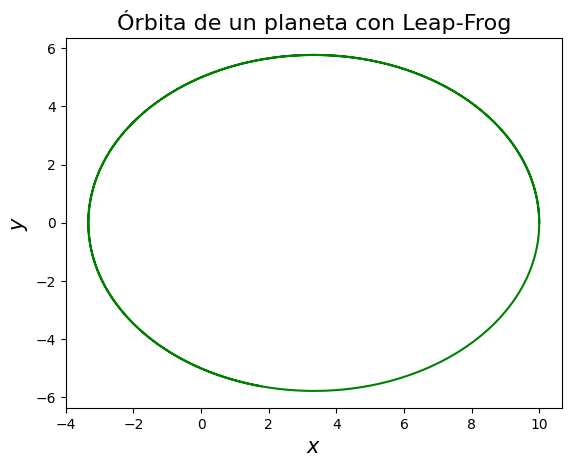

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

datos=pd.read_csv('./datosLF.dat',sep=' ',names=['x','y'])

plt.plot(datos['x'],datos["y"], "green")
plt.xlabel("$x$",size=15)
plt.ylabel("$y$",size=15)
plt.title("Órbita de un planeta con Leap-Frog",size=16)

# Método de Verlet:
Implementaremos el método de Verlet, usando el programa que hicimos para modelar un planeta en Python *(Métodos de Simulación - Elementos discretos)*


Librerías y variables globales:

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import scipy as sci
GM=1.0

Clase cuerpo:

In [ ]:
class Cuerpo:
  def __init__(self,x0,y0,z0,Vx0,Vy0,Vz0,m0):
    self.m=m0
    self.r=np.array([x0,y0,z0])
    self.V=np.array([Vx0,Vy0,Vz0])
  def CalculeFuerza(self):
    aux=-GM*self.m/np.linalg.norm(self.r)**3
    self.F = aux*self.r
  def Arranque(self,dt):
    self.rold=self.r-dt*self.V+(0.5*dt*dt/self.m)*self.F
  def Muevase(self,dt):
    self.rnew=2*self.r-self.rold+(dt*dt/self.m)*self.F
    self.V=(self.rnew-self.rold)/(2*dt)
    self.rold=self.r
    self.r=self.rnew

Programa principal:

In [ ]:
dt=0.1
Nsteps=2000
r0=10
omega=np.sqrt(GM/(r0**3))
T=2*np.pi/omega
V0=omega*r0

xdata=np.zeros(Nsteps)
ydata=np.zeros(Nsteps)

Planeta=Cuerpo(x0=r0,y0=0,z0=0,Vx0=0,Vy0=0.5*V0,Vz0=0,m0=0.453)
Planeta.CalculeFuerza()
Planeta.Arranque(dt)

for i in range (Nsteps):
  t=i*dt
  xdata[i]=Planeta.r[0]
  ydata[i]=Planeta.r[1]
  Planeta.CalculeFuerza()
  Planeta.Muevase(dt)

Text(0.5, 1.0, 'Órbita de un planeta con Verlet')

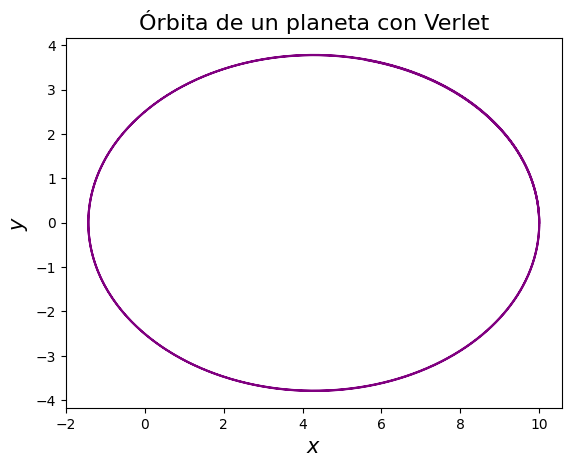

In [ ]:
plt.plot(xdata,ydata,"purple")
plt.xlabel("$x$",size=15)
plt.ylabel("$y$",size=15)
plt.title("Órbita de un planeta con Verlet",size=16)

# Método de Forest-Ruth:
**EN C++:** \\
Implementaremos el método simpléctico de Forest-Ruth, usando el programa que hicimos para modelar un planeta en C++ *(Métodos de Simulación - Quiz 3 (Planeta en C++))*


***SÓLO GRÁFICA:***

In [1]:
%%writefile PlanetaFR.cpp

#include <iostream>
#include <cmath>
#include "vector.h"
using namespace std;


// Constantes del problema físico:
const double GM=1;

// Constantes del algoritmo de integración
const double Theta=1.0/(2-pow(2.0,1.0/3));
const double ThetaU2=Theta/2;
const double UmThetaU2=(1-Theta)/2;
const double Um2Theta=1-2*Theta;

//Declaración de la clase:
class Cuerpo;

//Declaración de la interfase:
class Cuerpo{
  private:
    vector3D r,V,F; double m,R;
  public:
    void Inicie(double x0,double y0,double z0,double Vx0,double Vy0,double Vz0,
	        double m0,double R0);
    void CalculeFuerza(void);
    void Mueva_r(double dt, double coef);
    void Mueva_v(double dt, double coef);
    void Dibujese(void);
    double Getx(void){return r.x();}; // Inline
    double Gety(void){return r.y();}; // Inline
};

//Implementación de las funciones:
void Cuerpo::Inicie(double x0,double y0,double z0,double Vx0,double Vy0,double Vz0,
	      double m0,double R0){
  r.load(x0,y0,z0); V.load(Vx0,Vy0,Vz0); m=m0; R=R0;
}
void Cuerpo::CalculeFuerza(void){
  F.load(-GM*m*r.x()/pow(r.norm(),3),-GM*m*r.y()/pow(r.norm(),3),0);
}
void Cuerpo::Mueva_r(double dt, double coef){
  //Algoritmo de Forest-Ruth
  r+=(coef*dt)*V;
}
void Cuerpo::Mueva_v(double dt, double coef){
  //Algoritmo de Forest-Ruth
  V+=(coef*dt/m)*F;
}
void Cuerpo::Dibujese(void){
  cout<<" , "<<r.x()<<"+"<<R<<"*cos(t),"<<r.y()<<"+"<<R<<"*sin(t)";
}

//----------- Funciones Globales -----------

//Funciones de animación:
void InicieAnimacion(void){
  //cout<<"set terminal gif animate"<<end;
  //cout<<"set output 'PlanetaFR.gif'"<<end;
  cout<<"unset key"<<endl;
  cout<<"set xrange[-11:11]"<<endl;
  cout<<"set yrange[-11:11]"<<endl;
  cout<<"set size ratio -1"<<endl;
  cout<<"set parametric"<<endl;
  cout<<"set trange[0:7]"<<endl;
  cout<<"set isosamples 12"<<endl;
}

void InicieCuadro(void){
  cout<<"plot 0,0 ";
}

void TermineCuadro(void){
  cout<<endl;
}

int main(){
  double r0=10,m0=1;
  double omega=sqrt(GM/pow(r0,3));  double T=2*M_PI/omega,  V0=omega*r0;
  double t, dt=0.5, ttotal=1.1*T;
  int Ncuadros=2000; double tdibujo,tcuadro=ttotal/Ncuadros;
  Cuerpo Planeta;
  //InicieAnimacion();
  //----------(x0,y0,z0,Vx0,Vy0,Vz0,m0,R0)
  Planeta.Inicie( r0, 0, 0, 0, 0.5*V0, 0, 0.453, 1.0);
  for(t=tdibujo=0;t<ttotal;t+=dt,tdibujo+=dt){
    if(tdibujo>tcuadro){
      cout<<Planeta.Getx()<<" "<<Planeta.Gety()<<endl;
      //InicieCuadro();
      //Planeta.Dibujese();
      //TermineCuadro();
      tdibujo=0;
    }
    Planeta.Mueva_r(dt,ThetaU2);
    Planeta.CalculeFuerza();  Planeta.Mueva_v(dt,Theta);
    Planeta.Mueva_r(dt,UmThetaU2);
    Planeta.CalculeFuerza();  Planeta.Mueva_v(dt,Um2Theta);
    Planeta.Mueva_r(dt,UmThetaU2);
    Planeta.CalculeFuerza();  Planeta.Mueva_v(dt,Theta);
    Planeta.Mueva_r(dt,ThetaU2);
  }
  return 0;
}

Writing PlanetaFR.cpp


In [ ]:
%%shell
g++ PlanetaFR.cpp
./a.out > datosFR.dat

Text(0.5, 1.0, 'Órbita de un planeta con Forest-Ruth')

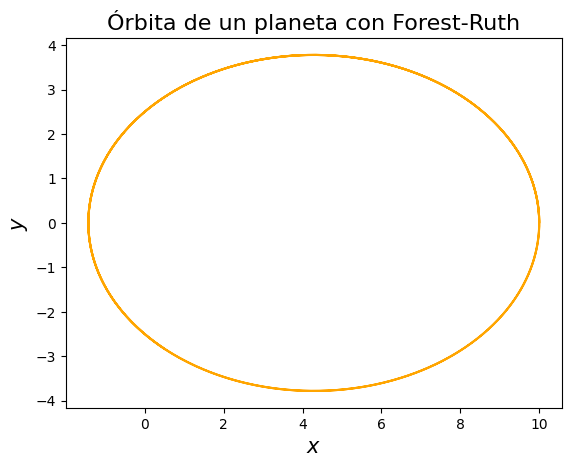

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

datos=pd.read_csv('./datosFR.dat',sep=' ',names=['x','y'])

plt.plot(datos['x'],datos["y"], "orange")
plt.xlabel("$x$",size=15)
plt.ylabel("$y$",size=15)
plt.title("Órbita de un planeta con Forest-Ruth",size=16)

***CON ANIMACIÓN (REQUIERE GNUPLOT):***

In [ ]:
%%writefile PlanetaFRAnimado.cpp

#include <iostream>
#include <cmath>
#include "vector.h"
using namespace std;


// Constantes del problema físico:
const double GM=1;

// Constantes del algoritmo de integración
const double Theta=1.0/(2-pow(2.0,1.0/3));
const double ThetaU2=Theta/2;
const double UmThetaU2=(1-Theta)/2;
const double Um2Theta=1-2*Theta;

//Declaración de la clase:
class Cuerpo;

//Declaración de la interfase:
class Cuerpo{
  private:
    vector3D r,V,F; double m,R;
  public:
    void Inicie(double x0,double y0,double z0,double Vx0,double Vy0,double Vz0,
	        double m0,double R0);
    void CalculeFuerza(void);
    void Mueva_r(double dt, double coef);
    void Mueva_v(double dt, double coef);
    void Dibujese(void);
    double Getx(void){return r.x();}; // Inline
    double Gety(void){return r.y();}; // Inline
};

//Implementación de las funciones:
void Cuerpo::Inicie(double x0,double y0,double z0,double Vx0,double Vy0,double Vz0,
	      double m0,double R0){
  r.load(x0,y0,z0); V.load(Vx0,Vy0,Vz0); m=m0; R=R0;
}
void Cuerpo::CalculeFuerza(void){
  F.load(-GM*m*r.x()/pow(r.norm(),3),-GM*m*r.y()/pow(r.norm(),3),0);
}
void Cuerpo::Mueva_r(double dt, double coef){
  //Algoritmo de Forest-Ruth
  r+=(coef*dt)*V;
}
void Cuerpo::Mueva_v(double dt, double coef){
  //Algoritmo de Forest-Ruth
  V+=(coef*dt/m)*F;
}
void Cuerpo::Dibujese(void){
  cout<<" , "<<r.x()<<"+"<<R<<"*cos(t),"<<r.y()<<"+"<<R<<"*sin(t)";
}

//----------- Funciones Globales -----------

//Funciones de animación:
void InicieAnimacion(void){
  cout<<"set terminal gif animate"<<endl;
  cout<<"set output 'PlanetaFR.gif'"<<endl;
  cout<<"unset key"<<endl;
  cout<<"set xrange[-5:15]"<<endl;
  cout<<"set yrange[-8:8]"<<endl;
  cout<<"set size ratio -1"<<endl;
  cout<<"set parametric"<<endl;
  cout<<"set trange[0:7]"<<endl;
  cout<<"set isosamples 12"<<endl;
}

void InicieCuadro(void){
  cout<<"plot 0,0 ";
}

void TermineCuadro(void){
  cout<<endl;
}

int main(){
  double r0=10,m0=1;
  double omega=sqrt(GM/pow(r0,3));  double T=2*M_PI/omega,  V0=omega*r0;
  double t, dt=0.5, ttotal=1.1*T;
  int Ncuadros=2000; double tdibujo,tcuadro=ttotal/Ncuadros;
  Cuerpo Planeta;
  InicieAnimacion();
  //----------(x0,y0,z0,Vx0,Vy0,Vz0,m0,R0)
  Planeta.Inicie( r0, 0, 0, 0, 0.5*V0, 0, 0.453, 1.0);
  for(t=tdibujo=0;t<ttotal;t+=dt,tdibujo+=dt){
    if(tdibujo>tcuadro){
      //cout<<Planeta.Getx()<<" "<<Planeta.Gety()<<endl;
      InicieCuadro();
      Planeta.Dibujese();
      TermineCuadro();
      tdibujo=0;
    }
    Planeta.Mueva_r(dt,ThetaU2);
    Planeta.CalculeFuerza();  Planeta.Mueva_v(dt,Theta);
    Planeta.Mueva_r(dt,UmThetaU2);
    Planeta.CalculeFuerza();  Planeta.Mueva_v(dt,Um2Theta);
    Planeta.Mueva_r(dt,UmThetaU2);
    Planeta.CalculeFuerza();  Planeta.Mueva_v(dt,Theta);
    Planeta.Mueva_r(dt,ThetaU2);
  }
  return 0;
}

Overwriting PlanetaFRAnimado.cpp


In [ ]:
%%shell
g++ PlanetaFRAnimado.cpp
./a.out > "Instrucciones.txt"

El archivo *Instrucciones.txt* contiene todas las instrucciones necesarias para hacer una animación (.gif) en GNUPLOT. Para ello, simplemente ponemos la instrucción 'load 'Instrucciones.txt'' en la interfaz de GNUPLOT (siempre y cuando todos los archivos se encuentren en el directorio escogido)

**EN PYTHON:**

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import scipy as sci

# Constantes del problema físico:
GM = 1.0

# Constantes del algoritmo de integración:
Theta = 1.0/(2.0-2.0**(1.0/3.0))
ThetaU2 = Theta/2
UmThetaU2 = (1-Theta)/2
Um2Theta = 1-2*Theta

In [ ]:
# Programa clase cuerpo:

class Cuerpo:
  def __init__(self,x0,y0,z0,Vx0,Vy0,Vz0,m0):
    self.m = m0
    self.r = np.array([x0,y0,z0])
    self.V = np.array([Vx0,Vy0,Vz0])
  def CalculeFuerza(self):
    aux = -GM*self.m/np.linalg.norm(self.r)**3
    self.F = aux*self.r
  def Mueva_r(self,dt,coef):
    self.r = self.r+(coef*dt)*self.V
  def Mueva_V(self,dt,coef):
    self.V = self.V+(coef*dt/self.m)*self.F

In [ ]:
# Programa principal:

dt = 0.5
Nsteps = 400
r0 = 10
omega = np.sqrt(GM/(r0**3))
T = 2*np.pi/omega
V0 = omega*r0

xdata = np.zeros(Nsteps)
ydata = np.zeros(Nsteps)

Planeta = Cuerpo(x0=r0,y0=0,z0=0,Vx0=0,Vy0=0.5*V0,Vz0=0,m0=0.453)

for i in range(Nsteps):
  t = i*dt
  xdata[i] = Planeta.r[0]
  ydata[i] = Planeta.r[1]
  Planeta.Mueva_r(dt,ThetaU2)
  Planeta.CalculeFuerza()
  Planeta.Mueva_V(dt,Theta)
  Planeta.Mueva_r(dt,UmThetaU2)
  Planeta.CalculeFuerza()
  Planeta.Mueva_V(dt,Um2Theta)
  Planeta.Mueva_r(dt,UmThetaU2)
  Planeta.CalculeFuerza()
  Planeta.Mueva_V(dt,Theta)
  Planeta.Mueva_r(dt,ThetaU2)

Text(0.5, 1.0, 'Órbita de un planeta con Forest-Ruth')

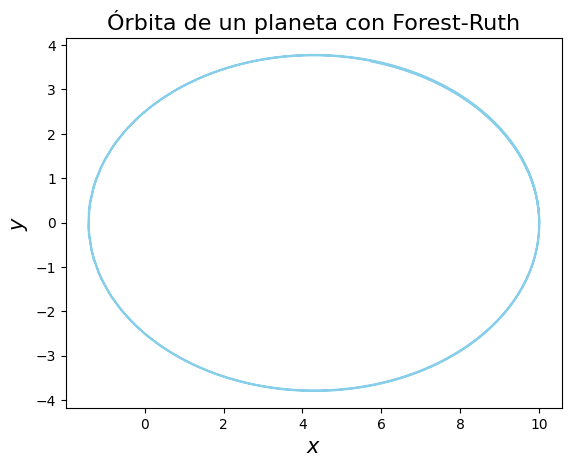

In [ ]:
plt.plot(xdata,ydata,"skyblue")
plt.xlabel("$x$",size=15)
plt.ylabel("$y$",size=15)
plt.title("Órbita de un planeta con Forest-Ruth",size=16)

# Método de PEFRL:

**EN C++:**

Implementaremos el método simpléctico de Forest-Ruth, usando el programa previo que hicimos para el Método de Forest-Ruth en C++:

In [ ]:
%%writefile PlanetaPEFRL.cpp

#include <iostream>
#include <cmath>
#include "vector.h"
using namespace std;


// Constantes del problema físico:
const double GM=1;

// Constantes del algoritmo de integración
const double Xi = 0.1786178958448091;
const double Lambda = -0.2123418310626054;
const double Chi = -0.06626458266981849;
const double Um2LambdaU2 = (1-2*Lambda)/2;
const double Um2ChipXi = 1-2*(Chi+Xi);

//Declaración de la clase:
class Cuerpo;

//Declaración de la interfase:
class Cuerpo{
  private:
    vector3D r,V,F; double m,R;
  public:
    void Inicie(double x0,double y0,double z0,double Vx0,double Vy0,double Vz0,
	        double m0,double R0);
    void CalculeFuerza(void);
    void Mueva_r(double dt, double coef);
    void Mueva_v(double dt, double coef);
    void Dibujese(void);
    double Getx(void){return r.x();}; // Inline
    double Gety(void){return r.y();}; // Inline
};

//Implementación de las funciones:
void Cuerpo::Inicie(double x0,double y0,double z0,double Vx0,double Vy0,double Vz0,
	      double m0,double R0){
  r.load(x0,y0,z0); V.load(Vx0,Vy0,Vz0); m=m0; R=R0;
}
void Cuerpo::CalculeFuerza(void){
  F.load(-GM*m*r.x()/pow(r.norm(),3),-GM*m*r.y()/pow(r.norm(),3),0);
}
void Cuerpo::Mueva_r(double dt, double coef){
  //Algoritmo de Forest-Ruth
  r+=(coef*dt)*V;
}
void Cuerpo::Mueva_v(double dt, double coef){
  //Algoritmo de Forest-Ruth
  V+=(coef*dt/m)*F;
}
void Cuerpo::Dibujese(void){
  cout<<" , "<<r.x()<<"+"<<R<<"*cos(t),"<<r.y()<<"+"<<R<<"sin(t)";
}

//----------- Funciones Globales -----------

//Funciones de animación:
void InicieAnimacion(void){
  //cout<<"set terminal gif animate"<<end;
  //cout<<"set output 'PlanetaFR.gif'"<<end;
  cout<<"unset key"<<endl;
  cout<<"set xrange[-11:11]"<<endl;
  cout<<"set yrange[-11:11]"<<endl;
  cout<<"set size ratio -1"<<endl;
  cout<<"set parametric"<<endl;
  cout<<"set trange[0:7]"<<endl;
  cout<<"set isosamples 12"<<endl;
}

void InicieCuadro(void){
  cout<<"plot 0,0 ";
}

void TermineCuadro(void){
  cout<<endl;
}

int main(){
  double r0=10,m0=1;
  double omega=sqrt(GM/pow(r0,3));  double T=2*M_PI/omega,  V0=omega*r0;
  double t, dt=1.0, ttotal=1.1*T;
  int Ncuadros=2000; double tdibujo,tcuadro=ttotal/Ncuadros;
  Cuerpo Planeta;
  //InicieAnimacion();
  //----------(x0,y0,z0,Vx0,Vy0,Vz0,m0,R0)
  Planeta.Inicie( r0, 0, 0, 0, 0.5*V0, 0, 0.453, 1.0);
  for(t=tdibujo=0;t<ttotal;t+=dt,tdibujo+=dt){
    if(tdibujo>tcuadro){
      cout<<Planeta.Getx()<<" "<<Planeta.Gety()<<endl;
      //InicieCuadro();
      //Planeta.Dibujese();
      //TermineCuadro();
      tdibujo=0;
    }
    Planeta.Mueva_r(dt,Xi);
    Planeta.CalculeFuerza();  Planeta.Mueva_v(dt,Um2LambdaU2);
    Planeta.Mueva_r(dt,Chi);
    Planeta.CalculeFuerza();  Planeta.Mueva_v(dt,Lambda);
    Planeta.Mueva_r(dt,Um2ChipXi);
    Planeta.CalculeFuerza();  Planeta.Mueva_v(dt,Lambda);
    Planeta.Mueva_r(dt,Chi);
    Planeta.CalculeFuerza();  Planeta.Mueva_v(dt,Um2LambdaU2);
    Planeta.Mueva_r(dt,Xi);
  }
  return 0;
}

Overwriting PlanetaPEFRL.cpp


In [ ]:
%%shell
g++ PlanetaPEFRL.cpp
./a.out > datosPEFRL.dat

Text(0.5, 1.0, 'Órbita de un planeta con PEFRL')

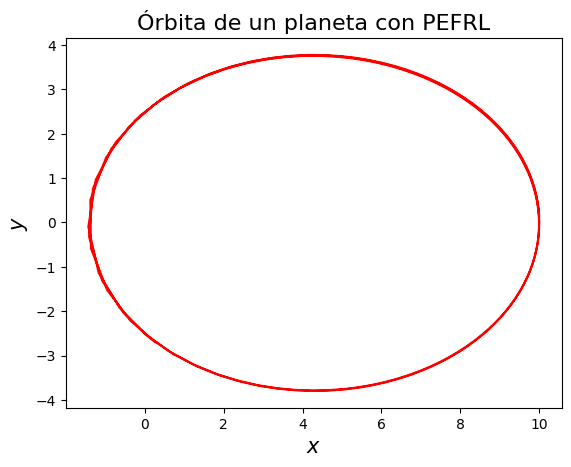

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

datos=pd.read_csv('./datosPEFRL.dat',sep=' ',names=['x','y'])

plt.plot(datos['x'],datos["y"], "red")
plt.xlabel("$x$",size=15)
plt.ylabel("$y$",size=15)
plt.title("Órbita de un planeta con PEFRL",size=16)

**EN PYTHON:**

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import scipy as sci

# Constantes del problema físico:
GM = 1.0

# Constantes del algoritmo de integración:
Xi = 0.1786178958448091
Lambda = -0.2123418310626054
Chi = -0.06626458266981849
Um2LambdaU2 = (1-2*Lambda)/2
Um2ChipXi = 1-2*(Chi+Xi)

In [ ]:
# Programa clase cuerpo:

class Cuerpo:
  def __init__(self,x0,y0,z0,Vx0,Vy0,Vz0,m0):
    self.m = m0
    self.r = np.array([x0,y0,z0])
    self.V = np.array([Vx0,Vy0,Vz0])
  def CalculeFuerza(self):
    aux = -GM*self.m/np.linalg.norm(self.r)**3
    self.F = aux*self.r
  def Mueva_r(self,dt,coef):
    self.r = self.r+(coef*dt)*self.V
  def Mueva_V(self,dt,coef):
    self.V = self.V+(coef*dt/self.m)*self.F

In [ ]:
# Programa principal:

dt = 1.0
Nsteps = 100
r0 = 10
omega = np.sqrt(GM/(r0**3))
T = 2*np.pi/omega
V0 = omega*r0

xdata = np.zeros(Nsteps)
ydata = np.zeros(Nsteps)

Planeta = Cuerpo(x0=r0,y0=0,z0=0,Vx0=0,Vy0=0.5*V0,Vz0=0,m0=0.453)

for i in range(Nsteps):
  t = i*dt
  xdata[i] = Planeta.r[0]
  ydata[i] = Planeta.r[1]
  Planeta.Mueva_r(dt,Xi)
  Planeta.CalculeFuerza()
  Planeta.Mueva_V(dt,Um2LambdaU2)
  Planeta.Mueva_r(dt,Chi)
  Planeta.CalculeFuerza()
  Planeta.Mueva_V(dt,Lambda)
  Planeta.Mueva_r(dt,Um2ChipXi)
  Planeta.CalculeFuerza()
  Planeta.Mueva_V(dt,Lambda)
  Planeta.Mueva_r(dt,Chi)
  Planeta.CalculeFuerza()
  Planeta.Mueva_V(dt,Um2LambdaU2)
  Planeta.Mueva_r(dt,Xi)

Text(0.5, 1.0, 'Órbita de un planeta con PEFRL')

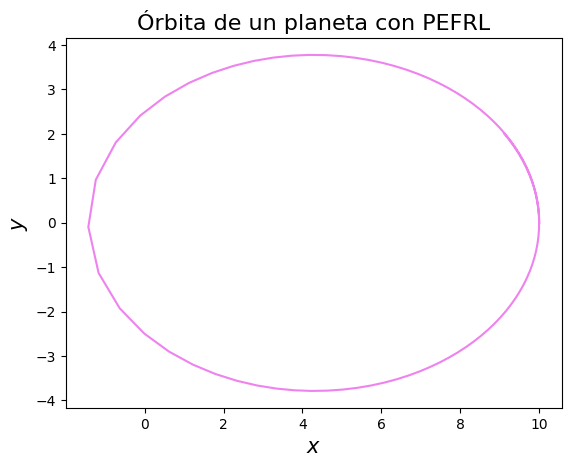

In [ ]:
plt.plot(xdata,ydata,"violet")
plt.xlabel("$x$",size=15)
plt.ylabel("$y$",size=15)
plt.title("Órbita de un planeta con PEFRL",size=16)